<a href="https://colab.research.google.com/github/IvanIndargo/Datamining_exersice/blob/main/ALP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint
from imblearn.combine import SMOTEENN

## Load Dataset (Data Preparation)
This Airlines Customer Satisfaction dataset contains information about customers who have previously flown with the airline, including their feedback on various aspects of the service and their flight-related data. The primary goal of this dataset is to predict whether a future customer will be satisfied with the airline's service based on the provided parameters and historical data.

The Airlines Customer Satisfaction dataset contains 23 features including: <br>
1. Gender: male or female
2. Customer type: loyal or non-loyal airline customer
3. Age: the actual age of the passenger
4. Type of travel: the purpose of the passenger's flight (personal or business travel)
5. Class: business, economy, economy plus
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)
9. Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)
10. Gate location: level of satisfaction with the gate location (0: not rated; 1-5)
11. Food and drink: food and drink satisfaction level (0: not rated; 1-5)
12. Online boarding: satisfaction level with online boarding (0: not rated; 1-5)
13. Seat comfort: seat satisfaction level (0: not rated; 1-5)
14. Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
15. On-board service: level of satisfaction with on-board service (0: not rated; 1-5)
16. Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)
17. Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)
18. Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)
19. Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)
20. Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)
21. Departure delay in minutes: Minutes delayed when departure
22. Arrival delay in minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level(Satisfaction or dissatisfaction)

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/VickySav/Datasets/refs/heads/main/Invistico_Airline.csv")
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
data.columns
# Menampilkan nama-nama kolom yang ada pada dataset

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
data.info()
# Dataset ini terdiri dari 129880 data dengan 23 kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

**Data Cleaning**

In [ ]:
data.isnull().sum()
# Mengecek apakah ada kolom yang memiliki missing value

,0
satisfaction,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0


In [ ]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean(), inplace=True)
# Mengisi data yang kosong dengan rata-rata dari kolom Arrival Delay in Minutes

<ipython-input-5-a909e161f0be>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean(), inplace=True)


**Exploratory Data Analysis**

In [ ]:
data.describe()
# Jumlah entri: 129,880 data.
# Usia penumpang: Rata-rata 39,43 tahun, rentang 7–85 tahun.
# Jarak penerbangan: Rata-rata 1981 km, rentang 50–6951 km.
# Penilaian layanan (skala 0-5): Sebagian besar rata-rata mendekati 3 (cukup memadai).
# Keterlambatan keberangkatan: Rata-rata 14,71 menit dan yang terlama hingga 1592 menit.
# Keterlambatan kedatangan: Rata-rata 15,09 menit dan yang terlama hingga 1584 menit.
# Jadi setiap penerbangan kemungkinan terkena keterlambatan sekitar 15 menit.
# Namun, masih ada yang perlu ditingkatkan, terutama dalam hal kenyamanan kursi, makanan, dan minuman.

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.407410
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


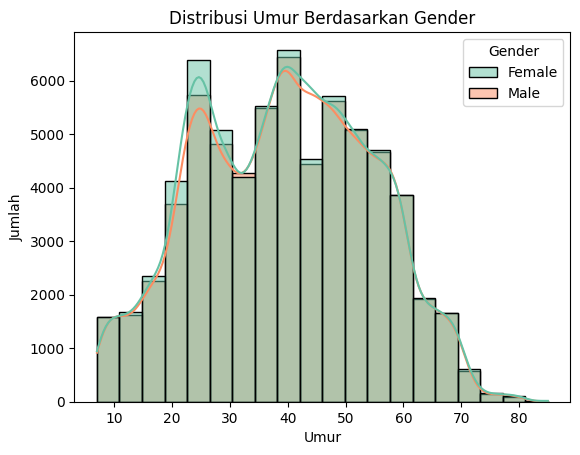

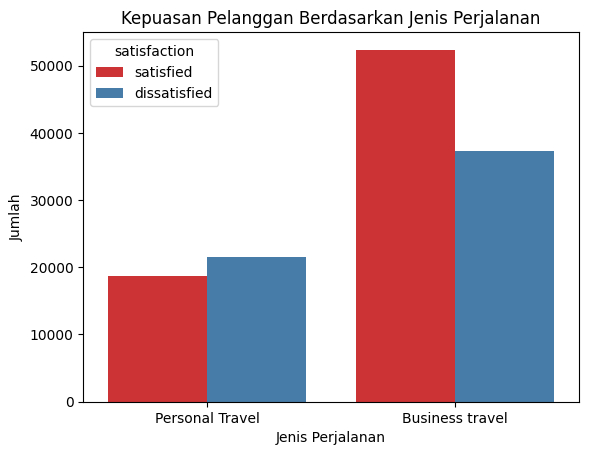

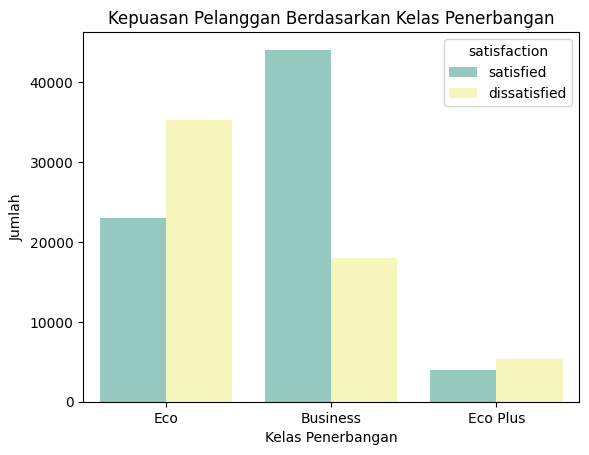

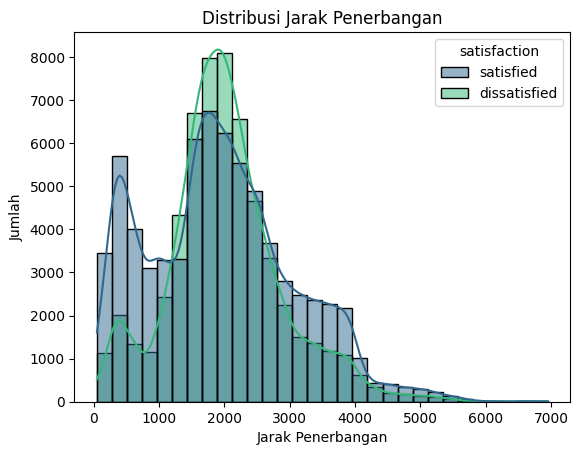

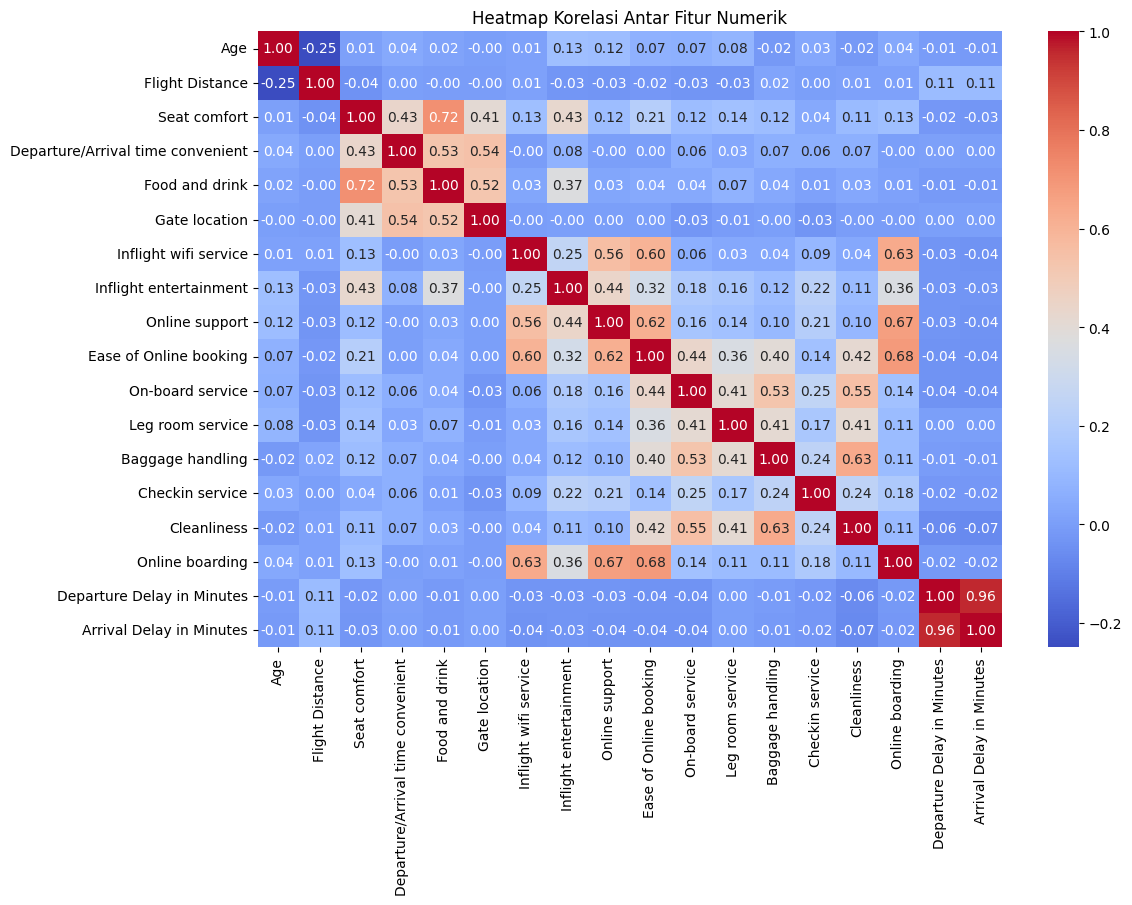

<ipython-input-8-a2ce06c845d9>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='satisfaction', y='Age', palette='pastel')


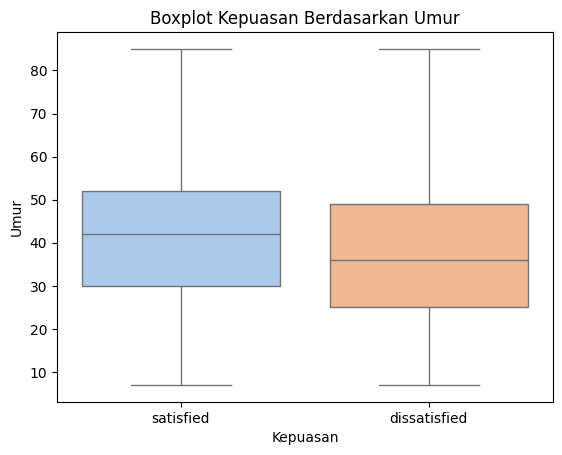

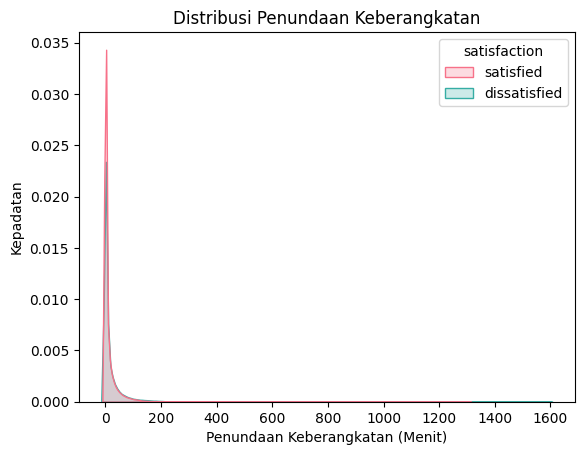

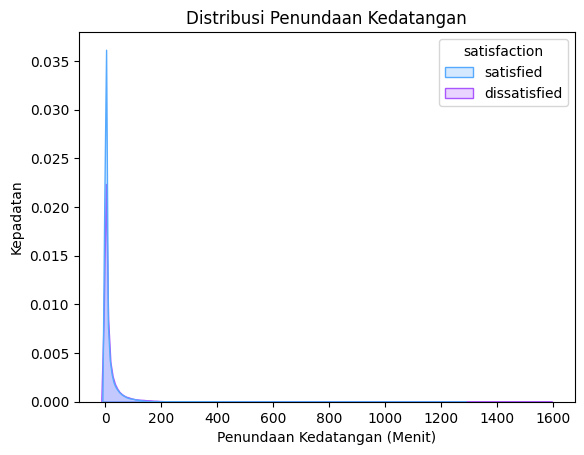

In [ ]:
# VISUALISASI
#Distribusi Umur berdasarkan Gender
plt.figure()
sns.histplot(data, x='Age', hue='Gender', kde=True, bins=20, palette='Set2')
plt.title('Distribusi Umur Berdasarkan Gender')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()
#Kepuasan Pelanggan Berdasarkan Jenis Perjalanan
plt.figure()
sns.countplot(data=data, x='Type of Travel', hue='satisfaction', palette='Set1')
plt.title('Kepuasan Pelanggan Berdasarkan Jenis Perjalanan')
plt.xlabel('Jenis Perjalanan')
plt.ylabel('Jumlah')
plt.show()
#Kepuasan Berdasarkan Kelas Penerbangan
plt.figure()
sns.countplot(data=data, x='Class', hue='satisfaction', palette='Set3')
plt.title('Kepuasan Pelanggan Berdasarkan Kelas Penerbangan')
plt.xlabel('Kelas Penerbangan')
plt.ylabel('Jumlah')
plt.show()
#Distribusi Jarak Penerbangan
plt.figure()
sns.histplot(data, x='Flight Distance', hue='satisfaction', kde=True, palette='viridis', bins=30)
plt.title('Distribusi Jarak Penerbangan')
plt.xlabel('Jarak Penerbangan')
plt.ylabel('Jumlah')
plt.show()
#Korelasi Antar Fitur Numerik
plt.figure(figsize=(12, 8))
numerical_data = data.select_dtypes(include=['float64', 'int64'])
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()
#Boxplot Kepuasan Berdasarkan Umur
plt.figure()
sns.boxplot(data=data, x='satisfaction', y='Age', palette='pastel')
plt.title('Boxplot Kepuasan Berdasarkan Umur')
plt.xlabel('Kepuasan')
plt.ylabel('Umur')
plt.show()
#Distribusi Penundaan Keberangkatan dan Kedatangan
plt.figure()
sns.kdeplot(data=data, x='Departure Delay in Minutes', hue='satisfaction', fill=True, palette='husl')
plt.title('Distribusi Penundaan Keberangkatan')
plt.xlabel('Penundaan Keberangkatan (Menit)')
plt.ylabel('Kepadatan')
plt.show()
plt.figure()
sns.kdeplot(data=data, x='Arrival Delay in Minutes', hue='satisfaction', fill=True, palette='cool')
plt.title('Distribusi Penundaan Kedatangan')
plt.xlabel('Penundaan Kedatangan (Menit)')
plt.ylabel('Kepadatan')
plt.show()


**Data Transformation**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']:
    data[col] = encoder.fit_transform(data[col])

In [ ]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
# Drop the 'Satisfaction' column before scaling
newData = data.drop(columns=['satisfaction'])

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(newData), columns=newData.columns)
data_scaled.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,-0.985340,-0.473422,1.691351,1.493951,0.653608,-1.671103,-2.037791,-1.95823,-1.975443,-0.758383,...,-1.163181,-0.361613,-0.365962,-2.697605,-0.601544,1.316217,-0.612761,-1.041485,-0.386481,-0.392924
1,1.014878,-0.473422,0.500820,1.493951,-0.955724,0.469852,-2.037791,-1.95823,-1.975443,0.007334,...,-1.163181,-0.361613,0.420925,0.397840,0.263150,-1.063645,-0.612761,-1.041485,7.756204,7.548283
2,-0.985340,-0.473422,-1.615680,1.493951,0.653608,0.152458,-2.037791,-1.95823,-1.975443,0.007334,...,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,-0.386481,-0.392924
3,-0.985340,-0.473422,1.360648,1.493951,0.653608,-1.322552,-2.037791,-1.95823,-1.975443,0.007334,...,-0.397781,-1.893529,-1.939736,-2.697605,-2.330931,0.522929,-2.349219,-0.271490,-0.386481,-0.392924
4,-0.985340,-0.473422,2.022054,1.493951,0.653608,-1.584452,-2.037791,-1.95823,-1.975443,0.007334,...,0.367620,-1.127571,-1.152849,-2.697605,-1.466238,0.522929,-1.480990,1.268500,-0.386481,-0.392924


In [ ]:
data_scaled.describe()
# Menampilkan distribusi data yang telah dinormalisasi dengan standard scaller.

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,...,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05
mean,-1.805352e-17,7.002577e-18,-1.155425e-16,8.403092e-17,7.002577e-18,1.015374e-16,6.652448e-17,-1.668583e-16,-4.201546e-17,-5.941249e-17,...,1.820670e-16,1.680618e-16,-1.680618e-16,-4.201546e-17,-2.520928e-16,-5.251933e-17,1.190438e-16,-1.260464e-16,1.641229e-17,-2.297721e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-9.853400e-01,-4.734218e-01,-2.144805e+00,-6.693658e-01,-9.557235e-01,-1.880428e+00,-2.037791e+00,-1.958230e+00,-1.975443e+00,-2.289818e+00,...,-2.693982e+00,-2.659487e+00,-2.726622e+00,-2.697605e+00,-2.330931e+00,-2.650220e+00,-3.217449e+00,-2.581476e+00,-3.864811e-01,-3.929238e-01
25%,-9.853400e-01,-4.734218e-01,-8.219928e-01,-6.693658e-01,-9.557235e-01,-6.059799e-01,-6.020176e-01,-6.486598e-01,-5.901365e-01,-7.583833e-01,...,-3.977808e-01,-1.127571e+00,-3.659618e-01,-1.149883e+00,-6.015440e-01,-2.703578e-01,-6.127608e-01,-1.041485e+00,-3.864811e-01,-3.929238e-01
50%,-9.853400e-01,-4.734218e-01,3.783531e-02,-6.693658e-01,6.536083e-01,-5.492008e-02,1.158689e-01,6.125377e-03,1.025167e-01,7.334096e-03,...,3.676197e-01,4.043454e-01,4.209251e-01,3.978403e-01,2.631497e-01,-2.703578e-01,2.554685e-01,4.985049e-01,-3.864811e-01,-3.929238e-01
75%,1.014878e+00,-4.734218e-01,7.653821e-01,1.493951e+00,6.536083e-01,5.477408e-01,8.337554e-01,6.609105e-01,7.951700e-01,7.730515e-01,...,1.133020e+00,1.170303e+00,4.209251e-01,1.171702e+00,1.127843e+00,5.229295e-01,1.123698e+00,4.985049e-01,-7.128035e-02,-5.444618e-02
max,1.014878e+00,2.112281e+00,3.014163e+00,1.493951e+00,2.262940e+00,4.838414e+00,1.551642e+00,1.315696e+00,1.487823e+00,1.538769e+00,...,1.133020e+00,1.170303e+00,1.207812e+00,1.171702e+00,1.127843e+00,1.316217e+00,1.123698e+00,1.268500e+00,4.143015e+01,4.084928e+01


# Clustering

**K-Means Clustering**

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

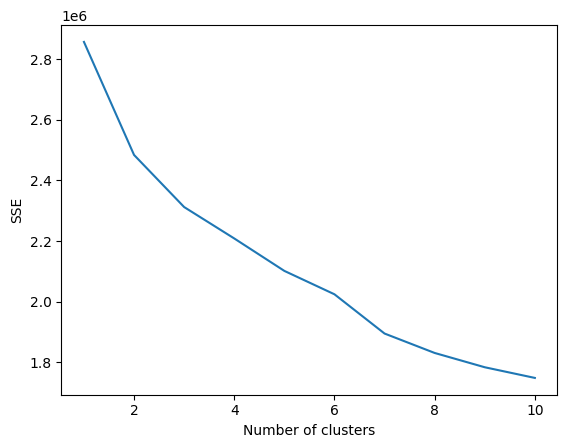

In [ ]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init='auto', random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print('The best k for your model is', kneedle.elbow)

The best k for your model is 7


Train the K-Means model on the dataset with the number of clusters you have determined.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, init='random', max_iter=300, n_init= 300, random_state=42)
y_pred = kmeans.fit_predict(data_scaled)
y_pred

array([0, 6, 1, ..., 6, 6, 6], dtype=int32)

In [ ]:
# Inverse transform the scaled data to get the original values
data_inverse = pd.DataFrame(scaler.inverse_transform(data_scaled), columns=data_scaled.columns)
data_inverse['KMeans'] = y_pred
data_inverse.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,KMeans
0,0.0,0.0,65.0,1.0,1.0,265.0,0.0,0.0,0.0,2.0,...,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0,0
1,1.0,0.0,47.0,1.0,0.0,2464.0,0.0,0.0,0.0,3.0,...,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0,6
2,0.0,0.0,15.0,1.0,1.0,2138.0,0.0,0.0,0.0,3.0,...,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0,1
3,0.0,0.0,60.0,1.0,1.0,623.0,0.0,0.0,0.0,3.0,...,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0,0
4,0.0,0.0,70.0,1.0,1.0,354.0,0.0,0.0,0.0,3.0,...,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0,0


In [ ]:
cluster_summary = data_inverse.groupby(y_pred).agg({
    'Gender': [pd.Series.mode, 'min', 'max'],
    'Customer Type': [pd.Series.mode, 'min', 'max'],
    'Age': ['mean', 'min', 'max'],
    'Type of Travel': [pd.Series.mode, 'min', 'max'],
    'Class': [pd.Series.mode, 'min', 'max'],
    'Seat comfort': ['mean','min', 'max'],
    'Departure/Arrival time convenient': ['mean'],
    'Food and drink': ['mean'],
    'Gate location': ['mean'],
    'Inflight wifi service': ['mean'],
    'Inflight entertainment': ['mean'],
    'Online support': ['mean'],
    'Ease of Online booking': ['mean'],
    'On-board service': ['mean'],
    'Leg room service': ['mean'],
    'Baggage handling': ['mean',],
    'Checkin service': ['mean'],
    'Cleanliness': ['mean'],
    'Online boarding': ['mean'],
    'Departure Delay in Minutes': ['mean', 'min', 'max'],
    'Arrival Delay in Minutes': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis("KMeans")

cluster_summary_transposed = cluster_summary.T

new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")

cluster_summary_transposed

KMeans                                   Cluster 0   Cluster 1   Cluster 2  \
Gender                            mode    0.000000    1.000000    0.000000   
                                  min     0.000000    0.000000    0.000000   
                                  max     1.000000    1.000000    1.000000   
Customer Type                     mode    0.000000    0.000000    1.000000   
                                  min     0.000000    0.000000    0.000000   
                                  max     1.000000    1.000000    1.000000   
Age                               mean   44.920893   33.222347   29.412615   
                                  min     7.000000    7.000000    7.000000   
                                  max    85.000000   85.000000   85.000000   
Type of Travel                    mode    0.000000    0.000000    0.000000   
                                  min     0.000000    0.000000    0.000000   
                                  max     1.000000    1.000000    1.000000   
Class                             mode    0.000000    1.000000    1.000000   
                                  min     0.000000    0.000000    0.000000   
                                  max     2.000000    2.000000    2.000000   
Seat comfort                      mean    2.637970    2.368631    2.459788   
                                  min     0.000000    0.000000    0.000000   
                                  max     5.000000    5.000000    5.000000   
Departure/Arrival time convenient mean    2.900534    2.970865    2.123564   
Food and drink                    mean    2.828046    2.607472    2.435669   
Gate location                     mean    2.936093    2.956535    2.977555   
Inflight wifi service             mean    3.295476    1.608771    3.945979   
Inflight entertainment            mean    3.396403    2.294125    2.442213   
Online support                    mean    3.498243    1.708559    3.785513   
Ease of Online booking            mean    2.645958    1.695788    3.955946   
On-board service                  mean    2.148217    3.163254    3.140075   
Leg room service                  mean    2.354407    3.217499    3.142966   
Baggage handling                  mean    2.234400    3.648296    3.636384   
Checkin service                   mean    2.757247    3.080133    3.119303   
Cleanliness                       mean    2.255443    3.681112    3.649547   
Online boarding                   mean    3.173187    1.599030    3.957772   
Departure Delay in Minutes        mean   10.633131   10.687606   10.258921   
                                  min     0.000000    0.000000    0.000000   
                                  max   155.000000  198.000000  154.000000   
Arrival Delay in Minutes          mean   11.167664   11.202166   10.782948   
                                  min     0.000000    0.000000    0.000000   
                                  max   141.000000  162.000000  150.000000   

KMeans                                   Cluster 3   Cluster 4   Cluster 5  \
Gender                            mode    0.000000    0.000000    0.000000   
                                  min     0.000000    0.000000    0.000000   
                                  max     1.000000    1.000000    1.000000   
Customer Type                     mode    0.000000    0.000000    0.000000   
                                  min     0.000000    0.000000    0.000000   
                                  max     1.000000    1.000000    1.000000   
Age                               mean   38.181534   43.814386   43.390731   
                                  min     7.000000    7.000000    7.000000   
                                  max    80.000000   85.000000   85.000000   
Type of Travel                    mode    1.000000    0.000000    0.000000   
                                  min     0.000000    0.000000    0.000000   
                                  max     1.000000    1.000000    1.000000   
Class                

In [ ]:
# count data from each cluster
data_inverse['KMeans'].value_counts().sort_index()

,count
KMeans,
0,21907
1,23099
2,13143
3,23318
4,19783
5,25007
6,3623


1. Cluster 0: Pelanggan dalam cluster ini mayoritas adalah wanita (gender 0) dengan usia rata-rata 44,9 tahun, menjadikannya kelompok dengan usia tertinggi di antara semua cluster. Mereka memberikan nilai moderat pada kenyamanan kursi (2,63) dan memiliki tingkat kepuasan kebersihan terendah (2,25). Rata-rata keterlambatan keberangkatan adalah 10,6 menit dan kedatangan 11,1 menit.
2. Cluster 1: Cluster ini didominasi oleh pria (gender 1), dengan usia rata-rata 33,2 tahun. Pelanggan dalam kelompok ini menunjukkan ketidakpuasan tertinggi terhadap dukungan online (1,70) dan kemudahan pemesanan online (1,69). Keterlambatan keberangkatan dan kedatangan masing-masing rata-rata 10,6 menit dan 11,2 menit.
3. Cluster 2: Pelanggan di cluster ini mayoritas adalah wanita (gender 0) dengan usia rata-rata 29,4 tahun, yang merupakan usia termuda di antara semua cluster. Mereka sangat puas dengan layanan wifi (3,94) dan kemudahan pemesanan online (3,95), namun memberikan nilai rendah pada kenyamanan kursi (2,45). Rata-rata keterlambatan keberangkatan dan kedatangan masing-masing adalah 10,2 menit.
4. Cluster 3: Cluster ini didominasi oleh pria (gender 1), dengan usia rata-rata 38,1 tahun. Pelanggan memberikan nilai tinggi pada hiburan dalam penerbangan (3,48) dan layanan ruang kaki (3,72). Keterlambatan keberangkatan rata-rata adalah 9,5 menit dan kedatangan 9,9 menit, yang relatif rendah dibandingkan cluster lainnya.
5. Cluster 4: Pelanggan dalam cluster ini mayoritas adalah pria (gender 1), dengan usia rata-rata 43,8 tahun. Mereka memberikan nilai terendah untuk kenyamanan kursi (1,68) dan makanan serta minuman (1,57). Namun, mereka menghadapi keterlambatan keberangkatan yang sangat tinggi, rata-rata 182,7 menit, serta keterlambatan kedatangan sebesar 184,8 menit, yang merupakan yang tertinggi di antara semua cluster.
6. Cluster 5: Cluster ini mayoritas terdiri dari wanita (gender 0), dengan tingkat kepuasan layanan tertinggi di hampir semua aspek. Mereka memberikan nilai tertinggi untuk kenyamanan kursi (4,10) dan kebersihan (4,26). Rata-rata keterlambatan keberangkatan adalah 9 menit dan kedatangan 8,9 menit, menjadikannya cluster dengan tingkat keterlambatan terendah.
7. Cluster 6: Pelanggan di cluster ini mayoritas adalah pria (gender 1), dengan usia rata-rata 38,8 tahun. Mereka cukup puas dengan kenyamanan kursi (2,71) dan wifi (3,00). Namun, mereka menghadapi keterlambatan keberangkatan tertinggi di antara semua cluster, rata-rata mencapai 182,7 menit.

**Hierarchical Clustering**
Hierarchical clustering uses the agglomerative method.

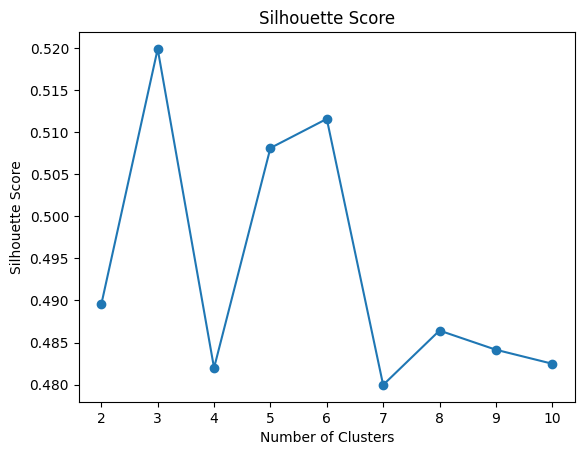

In [ ]:
data_sample = data_inverse.sample(n=10000, random_state=42)

silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(data_sample, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(data_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [ ]:
best_k = range(2,12)[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters is: {best_k}")

The best number of clusters is: 3


In [ ]:
# agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = agglo.fit_predict(data_sample)
y_hc

array([0, 1, 2, ..., 2, 1, 1])

In [ ]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
data_sample['Agglo'] = y_hc

data_sample.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,KMeans,Agglo
103044,0.0,0.0,59.0,0.0,0.0,1470.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,4.0,3.0,7.0,0.0,0,0
43282,0.0,1.0,22.0,0.0,1.0,1771.0,1.0,1.0,1.0,4.0,...,3.0,4.0,3.0,1.0,4.0,4.0,0.0,0.0,2,1
65543,1.0,0.0,55.0,0.0,0.0,3657.0,0.0,5.0,0.0,2.0,...,4.0,4.0,4.0,3.0,4.0,3.0,12.0,8.0,5,2
65083,0.0,0.0,41.0,0.0,0.0,1796.0,0.0,4.0,0.0,1.0,...,3.0,3.0,3.0,5.0,3.0,3.0,0.0,0.0,5,1
76496,1.0,0.0,42.0,0.0,1.0,1709.0,2.0,3.0,3.0,3.0,...,4.0,4.0,4.0,1.0,3.0,2.0,0.0,0.0,1,1


Display the cluster summary in the form of a dataframe.

In [ ]:
# Apply aggregation
cluster_summary = data_sample.groupby(y_hc).agg({
    'Gender': [pd.Series.mode, 'min', 'max'],
    'Customer Type': [pd.Series.mode, 'min', 'max'],
    'Age': ['mean', 'min', 'max'],
    'Type of Travel': [pd.Series.mode, 'min', 'max'],
    'Class': [pd.Series.mode, 'min', 'max'],
    'Seat comfort': ['mean','min', 'max'],
    'Departure/Arrival time convenient': ['mean'],
    'Food and drink': ['mean'],
    'Gate location': ['mean'],
    'Inflight wifi service': ['mean'],
    'Inflight entertainment': ['mean'],
    'Online support': ['mean'],
    'Ease of Online booking': ['mean'],
    'On-board service': ['mean'],
    'Leg room service': ['mean'],
    'Baggage handling': ['mean',],
    'Checkin service': ['mean'],
    'Cleanliness': ['mean'],
    'Online boarding': ['mean'],
    'Departure Delay in Minutes': ['mean', 'min', 'max'],
    'Arrival Delay in Minutes': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis('Agglo')
cluster_summary_transposed = cluster_summary.T

new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="Agglo")

cluster_summary_transposed

Agglo                                    Cluster 0   Cluster 1   Cluster 2
Gender                            mode    0.000000    1.000000    1.000000
                                  min     0.000000    0.000000    0.000000
                                  max     1.000000    1.000000    1.000000
Customer Type                     mode    0.000000    0.000000    0.000000
                                  min     0.000000    0.000000    0.000000
                                  max     1.000000    1.000000    1.000000
Age                               mean   44.337550   36.183574   36.730802
                                  min     7.000000    7.000000    8.000000
                                  max    80.000000   85.000000   85.000000
Type of Travel                    mode    0.000000    0.000000    0.000000
                                  min     0.000000    0.000000    0.000000
                                  max     1.000000    1.000000    1.000000
Class                             mode    1.000000    1.000000    0.000000
                                  min     0.000000    0.000000    0.000000
                                  max     2.000000    2.000000    2.000000
Seat comfort                      mean    2.915478    2.805306    2.722174
                                  min     0.000000    0.000000    0.000000
                                  max     5.000000    5.000000    5.000000
Departure/Arrival time convenient mean    2.990310    3.032384    2.939603
Food and drink                    mean    2.871063    2.832618    2.881795
Gate location                     mean    2.994078    2.991806    2.977567
Inflight wifi service             mean    3.274563    3.197620    3.402071
Inflight entertainment            mean    3.524899    3.223371    3.606557
Online support                    mean    3.623688    3.415529    3.647110
Ease of Online booking            mean    3.551009    3.390363    3.577222
On-board service                  mean    3.538627    3.439914    3.475410
Leg room service                  mean    3.548856    3.449473    3.522002
Baggage handling                  mean    3.684253    3.711861    3.699741
Checkin service                   mean    3.369044    3.308233    3.320966
Cleanliness                       mean    3.686406    3.731955    3.690250
Online boarding                   mean    3.387887    3.301600    3.446074
Departure Delay in Minutes        mean   10.601346   16.342567   25.273512
                                  min     0.000000    0.000000    0.000000
                                  max   178.000000  430.000000  933.000000
Arrival Delay in Minutes          mean   11.233966   16.899692   25.927054
                                  min     0.000000    0.000000    0.000000
                                  max   163.000000  438.000000  920.000000

1. Cluster 0 mewakili pelanggan yang lebih tua dengan tingkat kepuasan stabil.
2. Cluster 1 berisi pelanggan yang lebih muda dengan tingkat kepuasan cukup baik, tetapi waktu delay lebih tinggi.
3. Cluster 2 berisi pelanggan yang puas terhadap banyak layanan, tetapi sering mengalami delay.

**Hierarchical Visualization**

Complete Linkage

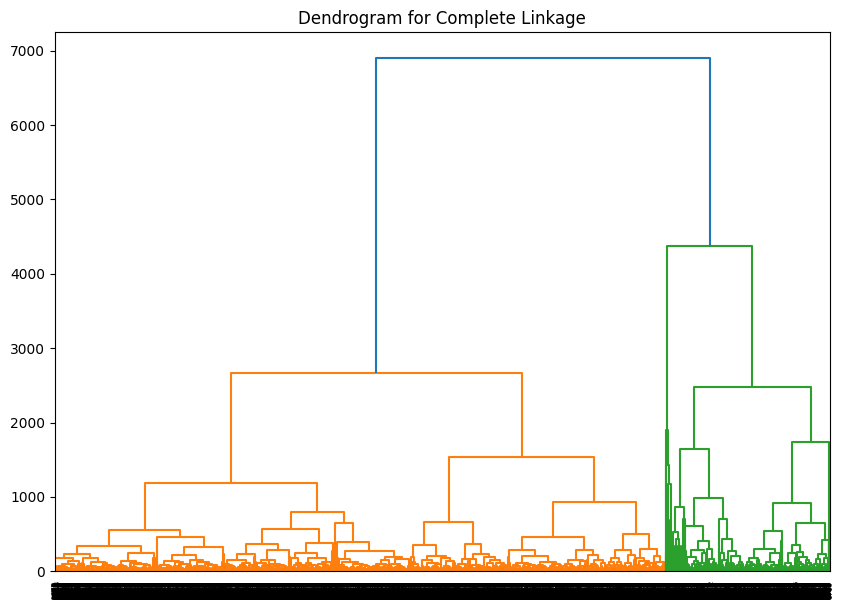

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(data_sample, method='complete'))
plt.show()

Average Linkage

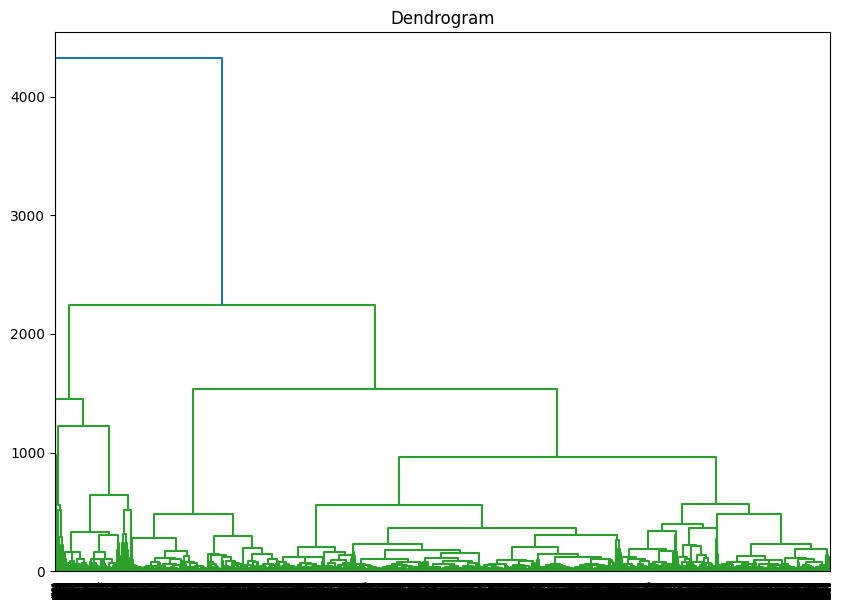

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(data_sample, method='average'))
plt.show()

Ward Method

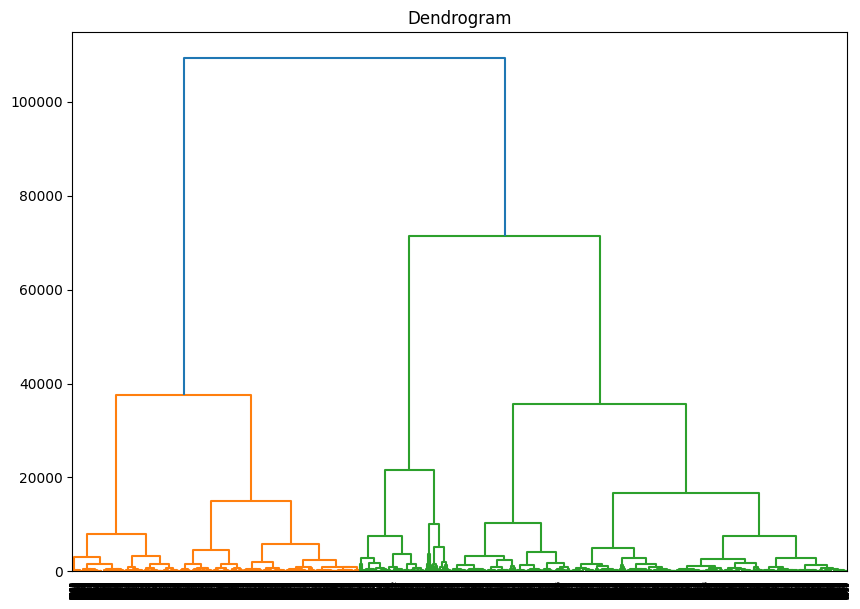

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(data_sample, method='ward'))
plt.show()

# Classification

# Machine Learning

In [ ]:
X = data.drop(['satisfaction'], axis = 1)
y = data['satisfaction']
# X digunakan untuk membuat prediksi, y adalah target atau output yang ingin diprediksi.

In [ ]:
# Menggunakan SMOTEENN untuk menangani masalah ketidakseimbangan data
smoteenn = SMOTEENN(random_state=42)
X_train_sm, y_train_sm = smoteenn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size = 0.2, random_state = 42)
# Membagi dataset X dan y menjadi training dan testing data dengan pembagian 80% untuk training dan 20% untuk testing

In [ ]:
X_train.shape, X_test.shape
# Menampilkan ukuran atau dimensi dari data latih (X_train) dan data uji (X_test) dalam bentuk tuple.

((49972, 22), (12494, 22))

# Decision Tree

1. Criterion Entropy

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_entropy.fit(X_train, y_train)
# Membuat model Decision Tree dengan menggunakan kriteria entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_clf_entropy = clf_entropy.predict(X_test)
# Untuk menghasilkan prediksi menggunakan kriteria entropy.

In [ ]:
print(f'Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_clf_entropy):.4f}')
# Menampilkan akurasi dari kriteria entropy berdasarkan y_test dan y_pred_clf_entropy.

Model accuracy score with criterion entropy: 0.9230


In [ ]:
y_train_clf_entropy = clf_entropy.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_clf_entropy)
training_acc = accuracy_score(y_train, y_train_clf_entropy)

print(f"Training set score: {training_acc:.4f}")
print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_clf_entropy, y_train, dan y_train_clf_entropy.
# Perbedaan skor yang kecil (0.23%) menunjukkan bahwa model memiliki generalization error yang kecil dan tidak terlalu terpengaruh oleh overfitting.

Training set score: 0.9253
Test set score: 0.9230


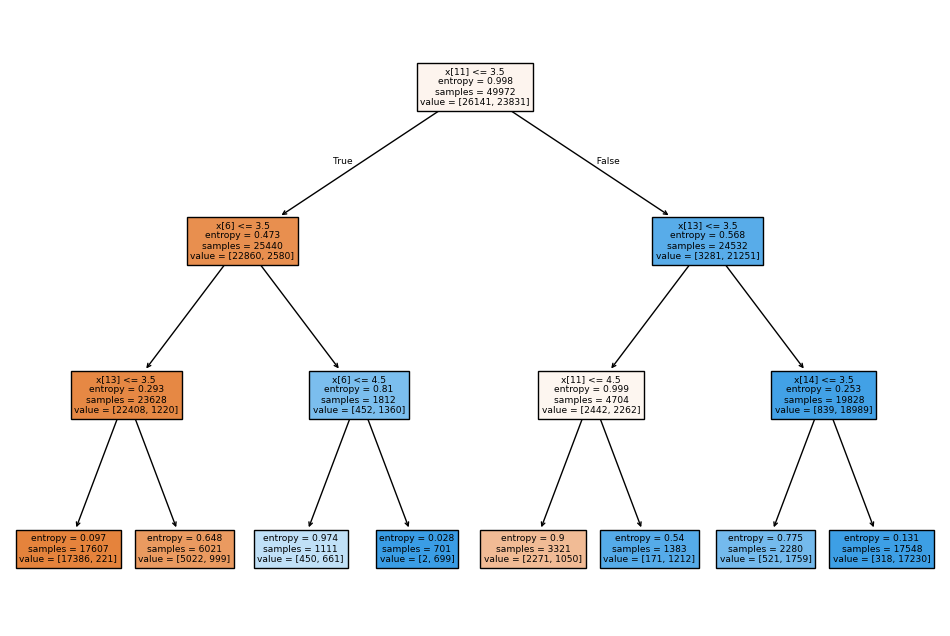

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_entropy, filled=True)
plt.show()

# Menampilkan visualisasi dari Decision Tree menggunakan plot_tree dari sklearn.

2. Criterion Gini index

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)
# Membuat model Decision Tree dengan menggunakan kriteria gini index.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
# Untuk menghasilkan prediksi menggunakan kriteria gini index.

In [ ]:
print(f'Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini):.4f}')
# Menampilkan akurasi dari kriteria gini berdasarkan y_test dan y_pred_gini.

Model accuracy score with criterion gini index: 0.9293


In [ ]:
y_train_gini = clf_gini.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_gini)
training_acc = accuracy_score(y_train, y_train_gini)

print(f"Training set score: {training_acc:.4f}")

print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_gini, y_train, dan y_train_gini.
# Perbedaan antara skor training dan test kecil (hanya 0.33%). Ini menunjukkan performa yang stabil dan tidak ada underfitting maupun overfitting.

Training set score: 0.9326
Test set score: 0.9293


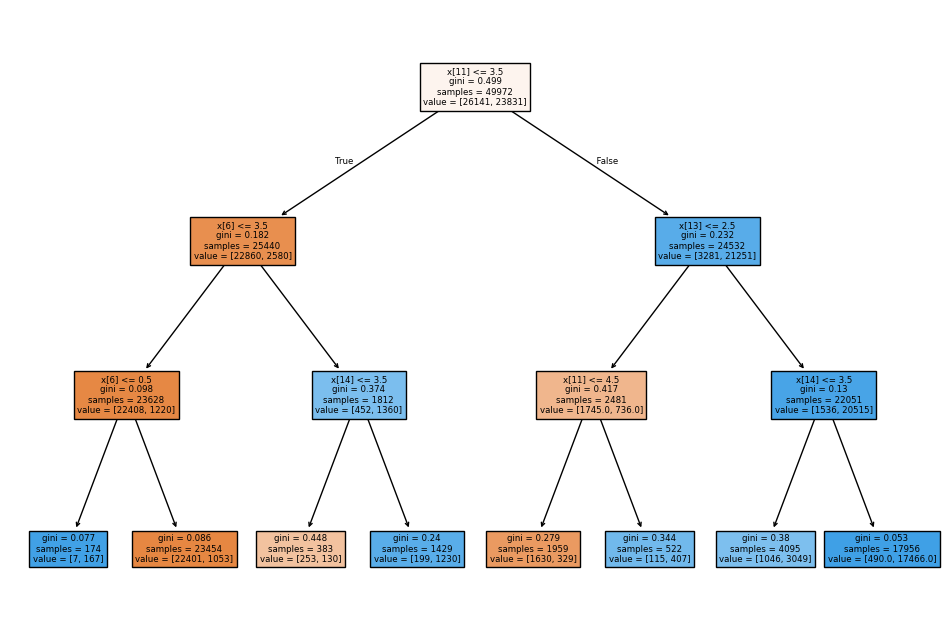

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, filled=True)
plt.show()

# Menampilkan visualisasi dari Decision Tree menggunakan plot_tree dari sklearn.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [ ]:
cm_entropy = confusion_matrix(y_test, y_pred_clf_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:")
print(cm_entropy)
print("\nConfusion Matrix Gini:")
print(cm_gini)

# Menampilkan confusion matrix dari kriteria entropy dan kriteria gini index.

Confusion Matrix Entropy:
[[6111  378]
 [ 584 5421]]

Confusion Matrix Gini:
[[6014  475]
 [ 408 5597]]


In [ ]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_clf_entropy))

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))

# Menampilkan classification report dari kriteria entropy dan kriteria gini index.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6489
           1       0.93      0.90      0.92      6005

    accuracy                           0.92     12494
   macro avg       0.92      0.92      0.92     12494
weighted avg       0.92      0.92      0.92     12494


Classification Report Gini
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6489
           1       0.92      0.93      0.93      6005

    accuracy                           0.93     12494
   macro avg       0.93      0.93      0.93     12494
weighted avg       0.93      0.93      0.93     12494



# Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Membuat model dengan menggunakan Naive Bayes.

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)
# Untuk menghasilkan prediksi menggunakan Naive Bayes.

In [ ]:
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy Score: {accuracy:.4f}")
# Menampilkan akurasi dari Naive Bayes berdasarkan y_test dan y_pred_nb.

cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix Naive Bayes:")
print(cm_nb)
# Menampilkan confusion matrix dari Naive Bayes.

Accuracy Score: 0.9256
Confusion Matrix Naive Bayes:
[[6035  454]
 [ 476 5529]]


In [ ]:
print("Classification Report Naive Bayes")
print(classification_report(y_test, y_pred_nb))
# Menampilkan classification report dari Naive Bayes.

Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6489
           1       0.92      0.92      0.92      6005

    accuracy                           0.93     12494
   macro avg       0.93      0.93      0.93     12494
weighted avg       0.93      0.93      0.93     12494



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 359 # Jumlah tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
# Untuk menghasilkan prediksi menggunakan KNN.

In [ ]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {accuracy:.4f}")
# Menampilkan akurasi dari KNN berdasarkan y_test dan y_pred_knn.

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix KNN:")
print(cm_knn)
# Menampilkan confusion matrix dari KNN.

Accuracy Score: 0.7584
Confusion Matrix KNN:
[[5108 1381]
 [1638 4367]]


In [ ]:
print("Classification Report KNN")
print(classification_report(y_test, y_pred_knn))

# Menampilkan classification report dari KNN.
# INTERPRET

Classification Report KNN
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      6489
           1       0.76      0.73      0.74      6005

    accuracy                           0.76     12494
   macro avg       0.76      0.76      0.76     12494
weighted avg       0.76      0.76      0.76     12494



# Random Forest

In [ ]:
rndForest = RandomForestClassifier(n_estimators = 100, random_state=42)
rndForest.fit(X_train, y_train)

# Membuat model Random Forest Classifier

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rndForest = rndForest.predict(X_test)

# Untuk menghasilkan prediksi menggunakan Random Forest.

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rndForest)

print(f"Accuracy Score: {accuracy:.4f}")

# Menampilkan akurasi dari Naive Bayes berdasarkan y_test dan y_pred_rndForest, y_test_sm dan y_pred_rf_sm.

Accuracy Score: 0.9846


In [ ]:
cm_rndForest = confusion_matrix(y_test, y_pred_rndForest)

print("Confusion Matrix Random Forest:")
print(cm_rndForest)

# Menampilkan confusion matrix dari Random Forest

Confusion Matrix Random Forest:
[[6393   96]
 [  96 5909]]


In [ ]:
print("Classification Report Random Forest")
print(classification_report(y_test, y_pred_rndForest))

# Menampilkan classification report dari Random Forest

Classification Report Random Forest
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6489
           1       0.98      0.98      0.98      6005

    accuracy                           0.98     12494
   macro avg       0.98      0.98      0.98     12494
weighted avg       0.98      0.98      0.98     12494



# Conclusion

In [ ]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_clf_entropy))

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))

print("Classification Report Naive Bayes")
print(classification_report(y_test, y_pred_nb))

print("Classification Report KNN")
print(classification_report(y_test, y_pred_knn))

print("Classification Report Random Forest")
print(classification_report(y_test, y_pred_rndForest))


Classification Report Entropy
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6489
           1       0.93      0.90      0.92      6005

    accuracy                           0.92     12494
   macro avg       0.92      0.92      0.92     12494
weighted avg       0.92      0.92      0.92     12494


Classification Report Gini
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6489
           1       0.92      0.93      0.93      6005

    accuracy                           0.93     12494
   macro avg       0.93      0.93      0.93     12494
weighted avg       0.93      0.93      0.93     12494

Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6489
           1       0.92      0.92      0.92      6005

    accuracy                           0.93     12494
   macro avg       0.93      0.93   

* Entropy dan Gini, yang merupakan dua varian dari decision tree, menunjukkan akurasi yang mirip (92% dan 93%, masing-masing) dengan precision dan recall yang baik, tetapi Entropy sedikit lebih baik dalam recall untuk kelas 0, sedangkan Gini lebih unggul di kelas 1.
* Naive Bayes menunjukkan akurasi 93%, dengan precision, recall, dan f1-score yang sangat baik untuk kedua kelas, yaitu 0 dan 1.
* Model KNN memiliki akurasi lebih rendah, yakni 76%, dengan nilai precision, recall, dan f1-score yang lebih rendah, terutama pada kelas 1.
* Model Random Forest menunjukkan kinerja terbaik dengan akurasi 98%, diikuti dengan precision, recall, dan f1-score yang sangat tinggi untuk kedua kelas, 0 dan 1.

**Secara keseluruhan, Random Forest memberikan hasil terbaik diikuti oleh Naive Bayes, Gini, Entropy, dan KNN yang memiliki kinerja lebih rendah.**